## Cost of Living Data Analysis and Clustering Project

This project uses the publicly available Cost of Living Dataset by Numbeo, which contains costs of different categories for many cities in the world.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('dataset/cost-of-living.csv')
df.head()

,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1


In [11]:
df.shape

(4874, 59)

In [12]:
df.dtypes

Unnamed: 0        int64
city             object
country          object
x1              float64
x2              float64
x3              float64
x4              float64
x5              float64
x6              float64
x7              float64
x8              float64
x9              float64
x10             float64
x11             float64
x12             float64
x13             float64
x14             float64
x15             float64
x16             float64
x17             float64
x18             float64
x19             float64
x20             float64
x21             float64
x22             float64
x23             float64
x24             float64
x25             float64
x26             float64
x27             float64
x28             float64
x29             float64
x30             float64
x31             float64
x32             float64
x33             float64
x34             float64
x35             float64
x36             float64
x37             float64
x38             float64
x39             

In [13]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
count,4874.000000,4449.000000,4432.000000,4552.000000,4385.000000,4445.000000,4540.000000,4438.000000,4571.000000,4494.000000,...,4337.000000,3533.000000,3465.000000,3418.000000,3385.000000,2681.000000,2609.000000,3459.000000,3894.000000,4874.000000
mean,2436.500000,10.321643,43.213592,6.875426,3.376732,3.937287,2.742822,1.513053,1.110768,1.139455,...,85.420108,710.696156,559.472898,1252.427627,973.603867,3207.173025,2323.089766,1817.033501,6.527214,0.186705
std,1407.146936,7.165507,25.365827,2.669017,2.080606,2.088773,1.353734,0.905525,0.749957,0.513458,...,40.328050,650.404203,529.592777,1222.803640,926.552107,6222.564176,3536.720519,1626.482870,5.423472,0.389714
min,0.000000,0.450000,3.250000,1.060000,0.320000,0.310000,0.220000,0.110000,0.070000,0.260000,...,7.570000,21.690000,12.200000,61.200000,27.110000,109.530000,48.010000,18.000000,0.600000,0.000000
25%,1218.250000,4.310000,22.350000,4.910000,1.590000,2.220000,1.560000,0.750000,0.470000,0.820000,...,57.620000,254.440000,168.970000,465.720000,325.920000,1118.030000,778.890000,478.255000,3.000000,0.000000
50%,2436.500000,9.830000,40.000000,6.960000,3.000000,3.640000,2.630000,1.450000,1.040000,1.040000,...,83.100000,519.350000,400.000000,934.000000,720.710000,2077.390000,1558.040000,1298.370000,5.210000,0.000000
75%,3654.750000,15.000000,60.000000,8.500000,5.000000,5.190000,3.722500,2.080000,1.570000,1.300000,...,106.670000,986.760000,791.670000,1700.000000,1367.330000,3782.820000,2796.500000,2742.500000,8.497500,0.000000
max,4873.000000,56.980000,211.350000,21.810000,15.000000,17.500000,10.000000,8.000000,5.770000,6.810000,...,542.740000,12608.830000,8989.370000,27006.110000,17868.180000,237522.540000,79174.180000,12681.260000,61.330000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4874 non-null   int64  
 1   city          4874 non-null   object 
 2   country       4874 non-null   object 
 3   x1            4449 non-null   float64
 4   x2            4432 non-null   float64
 5   x3            4552 non-null   float64
 6   x4            4385 non-null   float64
 7   x5            4445 non-null   float64
 8   x6            4540 non-null   float64
 9   x7            4438 non-null   float64
 10  x8            4571 non-null   float64
 11  x9            4494 non-null   float64
 12  x10           4457 non-null   float64
 13  x11           4538 non-null   float64
 14  x12           4369 non-null   float64
 15  x13           4393 non-null   float64
 16  x14           4318 non-null   float64
 17  x15           4312 non-null   float64
 18  x16           4509 non-null 

### Data Cleaning

This section will look for bad and/or duplicate data entries to clean up the dataset, which will prepare it for classification and ranking later on.

In [18]:
# Check for duplicate city/country combinations
df['city_country'] = df['city'].str.strip() + ', ' + df['country'].str.strip()
print(df.isnull().sum())

Unnamed: 0         0
city               0
country            0
x1               425
x2               442
x3               322
x4               489
x5               429
x6               334
x7               436
x8               303
x9               380
x10              417
x11              336
x12              505
x13              481
x14              556
x15              562
x16              365
x17              375
x18              435
x19              464
x20              430
x21              427
x22              495
x23              384
x24              460
x25              725
x26              651
x27              485
x28             1473
x29             2124
x30              861
x31             1005
x32             1368
x33              578
x34             1035
x35              970
x36              474
x37             1172
x38              340
x39             1351
x40             2366
x41              469
x42             1113
x43             1644
x44              461
x45          

In [19]:
df['empty_data'] = df.iloc[:, 2:-2].isnull().sum(axis=1)
print(df.isnull().sum())

# Good Data and Poor Data
good_data = df[df['data_quality'] == 1]
poor_data = df[df['data_quality'] == 0]
good_data.drop(['data_quality'], inplace=True, axis=1)
poor_data.drop(['data_quality'], inplace=True, axis=1)

poor_data_missing = poor_data.isnull().sum().iloc[3:57]
good_data_missing = good_data.isnull().sum().iloc[3:57]

Unnamed: 0         0
city               0
country            0
x1               425
x2               442
                ... 
x54             1415
x55              980
data_quality       0
city_country       0
empty_data         0
Length: 61, dtype: int64


/var/folders/k7/r3_hs43d4kddbzlf5y2gdgqh0000gn/T/ipykernel_22175/1329643395.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data.drop(['data_quality'], inplace=True, axis=1)
/var/folders/k7/r3_hs43d4kddbzlf5y2gdgqh0000gn/T/ipykernel_22175/1329643395.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor_data.drop(['data_quality'], inplace=True, axis=1)


Text(0.5, 0, 'Number of Missing Data')

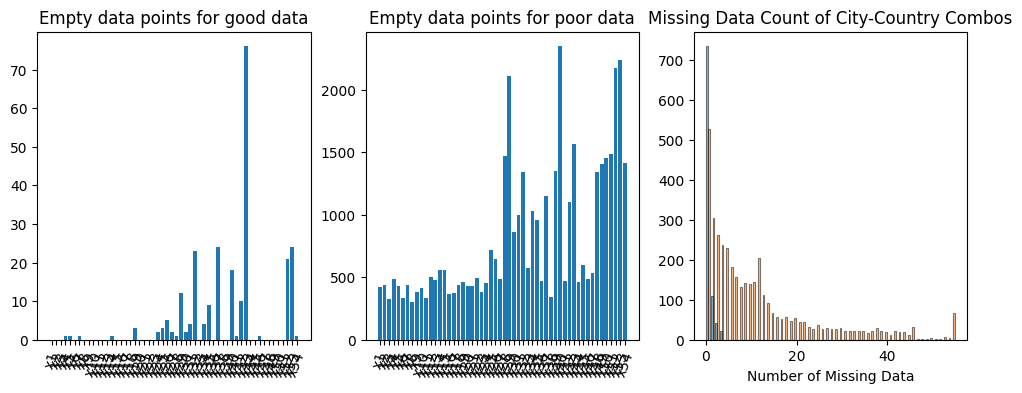

In [20]:
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(131)
plt.title('Empty data points for good data')
plt.bar(data=good_data_missing, x=good_data_missing.index, height=good_data_missing)
plt.xticks(rotation=70)

ax2 = plt.subplot(132)
plt.title('Empty data points for poor data')
plt.bar(data=poor_data_missing, x=poor_data_missing.index, height=poor_data_missing)
plt.xticks(rotation=70)

# Histogram of Missing Values
ax3 = plt.subplot(133)
step = 1
start = np.floor(min(df['empty_data']) / step) * step
stop = max(df['empty_data']) + step
bin_edges = np.arange(start, stop, step=step)
plt.hist([good_data['empty_data'], poor_data['empty_data']], label=['Good Quality', 'Poor Quality'],
         bins=bin_edges, edgecolor='black', linewidth=0.8, alpha=0.5)
plt.title('Missing Data Count of City-Country Combos')
plt.xlabel('Number of Missing Data')

From the histograms here, we can see that the Numbeo-classified good data cities never have more than 3 missing values, whereas the bad data cities can have nearly all missing data.

We will set the good data threshold to <=3 missing values, which contains all of the good data and a handful of the bad data.

In [21]:
df_new = df[df['empty_data'] < 4]

df_new['city_country'] = df_new['city'].str.strip() + ', ' + df_new['country'].str.strip()
print(df_new.pop('city_country').nunique())

2245


/var/folders/k7/r3_hs43d4kddbzlf5y2gdgqh0000gn/T/ipykernel_22175/3695033619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['city_country'] = df_new['city'].str.strip() + ', ' + df_new['country'].str.strip()


The number of unique city-country combinations is 2262, which is still a decently sized data set to determine a cost of living index.

In [22]:
good_data = df_new[df_new['data_quality'] == 1]
poor_data = df_new[df_new['data_quality'] == 0]
good_data.drop(['data_quality'], inplace=True, axis=1)
poor_data.drop(['data_quality'], inplace=True, axis=1)

poor_data_missing = poor_data.isnull().sum().iloc[3:57]
good_data_missing = good_data.isnull().sum().iloc[3:57]

/var/folders/k7/r3_hs43d4kddbzlf5y2gdgqh0000gn/T/ipykernel_22175/643751697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data.drop(['data_quality'], inplace=True, axis=1)
/var/folders/k7/r3_hs43d4kddbzlf5y2gdgqh0000gn/T/ipykernel_22175/643751697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor_data.drop(['data_quality'], inplace=True, axis=1)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'x1'),
  Text(1, 0, 'x2'),
  Text(2, 0, 'x3'),
  Text(3, 0, 'x4'),
  Text(4, 0, 'x5'),
  Text(5, 0, 'x6'),
  Text(6, 0, 'x7'),
  Text(7, 0, 'x8'),
  Text(8, 0, 'x9'),
  Text(9, 0, 'x10'),
  Text(10, 0, 'x11'),
  Text(11, 0, 'x12'),
  Text(12, 0, 'x13'),
  Text(13, 0, 'x14'),
  Text(14, 0, 'x15'),
  Text(15, 0, 'x16'),
  Text(16, 0, 'x17'),
  Text(17, 0, 'x18'),
  Text(18, 0, 'x19'),
  Text(19, 0, 'x20'),
  Text(20, 0, 'x21'),
  Text(21, 0, 'x22'),
  Text(22, 0, 'x23'),
  Text(23, 0, 'x24'),
  Text(24, 0, 'x25'),
  Text(25, 0, 'x26'),
  Text(26, 0, 'x27'),
  Text(27, 0, 'x28'),
  Text(28, 0, 'x29'),
  Text(29, 0, 'x30'),
  Text(30, 0, 'x31'),
  Text(31, 0, 'x32'),


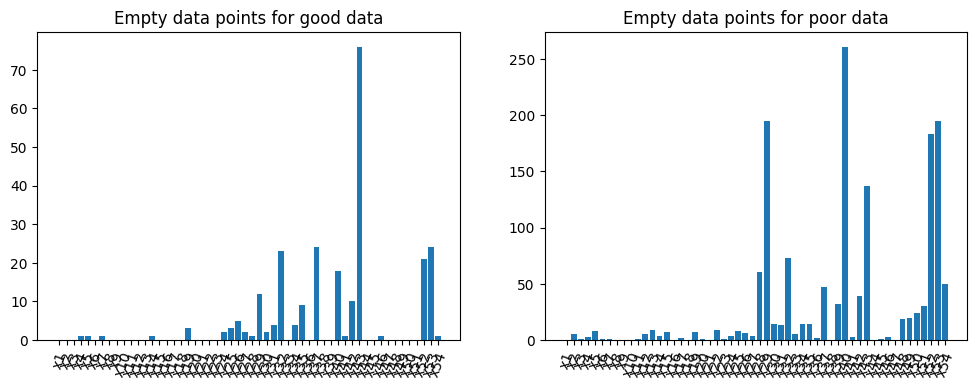

In [23]:
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)
plt.title('Empty data points for good data')
plt.bar(data=good_data_missing, x=good_data_missing.index, height=good_data_missing)
plt.xticks(rotation=70)

ax2 = plt.subplot(122)
plt.title('Empty data points for poor data')
plt.bar(data=poor_data_missing, x=poor_data_missing.index, height=poor_data_missing)
plt.xticks(rotation=70)

Out of 2262 cities, the category with the maximum number of missing data entries being around 250 is better than before, where the maximum number of missing data was around half of the overall number of cities in the dataset.

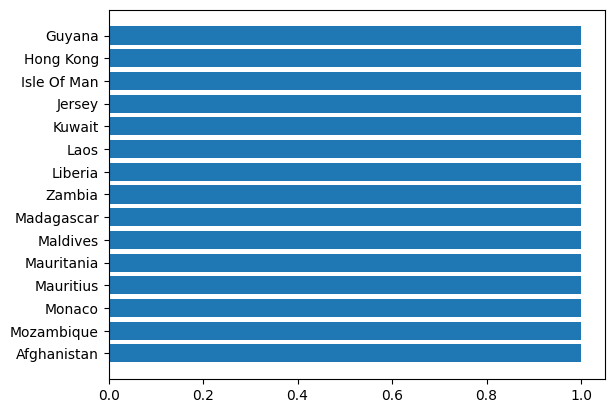

In [24]:
# Cities in each country for new dataset
num_countries = df_new.groupby('country').count().iloc[:, 0].sort_values(ascending=True)[0:15]

plt.figure()
plt.barh(data=num_countries, width=num_countries, y=num_countries.index)
plt.show()

Majority of the cities in the reduced dataset is from the United States of America.

In [25]:
# Categorize data columns
restaurants = df_new[df_new.columns[3:11]]
groceries = df_new[df_new.columns[11:26]]
alcohol = df_new[df_new.columns[26:29]]
transit = df_new[df_new.columns[30:35]]
clothes = df_new[df_new.columns[46:50]]
housing = df_new[df_new.columns[50:56]]
salary = df_new[df_new.columns[57]]

categories = [restaurants, groceries, alcohol, transit, clothes, housing, salary]

In [26]:
# # Pairplots by Category
# for i, c in enumerate(categories):
#     plot = sns.PairGrid(c)
#     plot.map_diag(plt.hist)
#     plot.map_upper(plt.scatter)
#     plot.map_lower(plt.scatter)
#     plt.show()

### Dimensionality Reduction
The goal of this section is to find the least number of features that will still accurately characterize the dataset. We will try 2 methods, filtering correlated features and Principal Component Analysis (PCA).

#### Filtering Correlated Features

<Axes: >

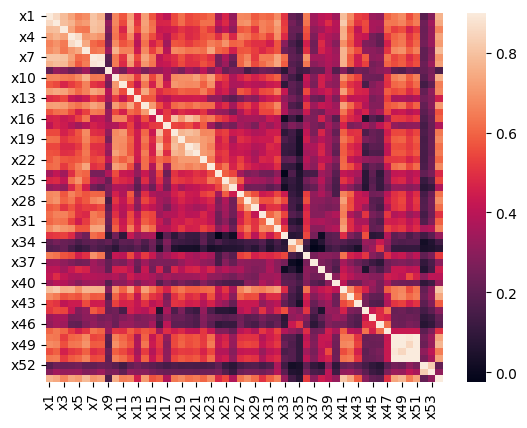

In [27]:
sns.heatmap(df_new.iloc[:, 3:57].corr(), vmax=0.9)

We plot a correlation heatmap with a correlation coefficient cutoff pf 0.9 to determine which features should be removed from the dataset.

From the heatmap, we can see that there are 5 groups of 2 features that can be considered highly correlated. These are (x1, x2), (x4, x5), (x7, x8), (x20, x21), and (x52, x53). Another group of correlated features is (x48: x51). 

...

### Markdown the Cost of Living by Country

#### Cost of Living by Country
A simple Cost of Living Index can be detemrined using an average of all the price data. Price data should be normalized so that there is no bias from larger value columns in the dataset, such as car or housing prices.

Salary is also an important contributor to Cost of Living, but it must be included in a way that is opposite of increasing cost. The higher the cost of items, the lower the cost of living. The lower the average salary of the country, the lower the cost of living.

We will take the salary divided by the average of normalized costs, then rank this index to determine Cost of Living.

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from statistics import median

In [29]:
df_by_country = df_new.iloc[:, 2:58].groupby('country').median()
df_by_country.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.67,5.56,3.06,NaN,NaN,0.920,0.22,0.130,0.59,0.23,...,30.00,35.56,107.120,63.900,238.93,144.470,683.440,350.05,192.62,13.88
Albania,3.96,22.02,3.76,1.32,1.760,1.150,1.09,0.590,1.08,0.55,...,62.77,65.66,205.560,103.520,282.87,204.990,704.620,495.54,342.49,5.25
Algeria,1.90,14.44,2.89,1.44,1.625,0.475,0.42,0.185,0.69,0.16,...,55.73,61.61,142.025,102.305,246.74,160.685,949.655,577.74,241.93,6.00
Andorra,14.02,51.93,8.31,2.08,3.120,1.740,1.90,1.400,0.78,1.04,...,96.95,103.87,773.270,636.200,1514.77,1090.630,4362.530,3323.83,2473.83,2.50
Angola,7.84,64.25,10.51,2.20,1.500,3.930,1.95,1.420,2.49,2.58,...,267.21,208.25,220.390,80.850,6880.05,346.620,5421.610,3448.79,1428.77,25.00


In [30]:
min_max_scaler = MinMaxScaler()
df_by_country_scaled = min_max_scaler.fit_transform(df_by_country.to_numpy())
df_by_country_scaled = pd.DataFrame(df_by_country_scaled, columns=df_by_country.columns, index=df_by_country.index)
df_by_country_scaled.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.031195,0.000000,0.072516,NaN,NaN,0.085659,0.000000,0.000886,0.041304,0.020710,...,0.034409,0.057520,0.007538,0.006416,0.003008,0.005098,0.002411,0.003817,0.022011,0.294842
Albania,0.112371,0.109558,0.123278,0.064407,0.084311,0.129933,0.160813,0.082374,0.147826,0.068047,...,0.119864,0.155145,0.025955,0.018000,0.004645,0.010784,0.002500,0.005656,0.043040,0.094331
Algeria,0.039348,0.059105,0.060189,0.074576,0.074413,0.000000,0.036969,0.010629,0.063043,0.010355,...,0.101506,0.142009,0.014068,0.017644,0.003299,0.006621,0.003532,0.006695,0.028930,0.111757
Andorra,0.468983,0.308640,0.453227,0.128814,0.184018,0.243503,0.310536,0.225864,0.082609,0.140533,...,0.208997,0.279072,0.132167,0.173737,0.050529,0.093998,0.017908,0.041400,0.342099,0.030437
Angola,0.249911,0.390642,0.612763,0.138983,0.065249,0.665063,0.319778,0.229407,0.454348,0.368343,...,0.652989,0.617611,0.028729,0.011372,0.250369,0.024091,0.022369,0.042979,0.195462,0.553206


In [31]:
# Calculate Cost of Living Index by Country
def cost_of_living(row):
    costs = row.iloc[:-3].mean()
    salary = row.iloc[-2]
    # Note: row.iloc[-1] is the mortgage interest rate
    cost_of_living_index = salary / costs
    return cost_of_living_index

df_by_country_scaled['Cost of Living Index'] = df_by_country_scaled.apply(lambda x: cost_of_living(x), axis=1)
df_by_country_scaled['Rank'] = df_by_country_scaled['Cost of Living Index'].rank(method='max')
df_by_country_scaled.sort_values(by='Rank', ascending=True).head(20)[['Cost of Living Index', 'Rank']]

,Cost of Living Index,Rank
country,,
Cuba,0.000000,1.0
Syria,0.024461,2.0
Uganda,0.110338,3.0
Sudan,0.119882,4.0
Niger,0.131203,5.0
Venezuela,0.135564,6.0
Madagascar,0.146595,7.0
Turkmenistan,0.158166,8.0
Suriname,0.167396,9.0


In [32]:
# For curiousity, find where the United States ranks on CoL
df_by_country_scaled[['Cost of Living Index', 'Rank']].loc['United States']

Cost of Living Index      1.9929
Rank                    165.0000
Name: United States, dtype: float64

In [33]:
# Check countries above the United States
df_by_country_scaled.sort_values(by='Rank', ascending=True)[['Cost of Living Index', 'Rank']].iloc[:33, :]

,Cost of Living Index,Rank
country,,
Cuba,0.000000,1.0
Syria,0.024461,2.0
Uganda,0.110338,3.0
Sudan,0.119882,4.0
Niger,0.131203,5.0
Venezuela,0.135564,6.0
Madagascar,0.146595,7.0
Turkmenistan,0.158166,8.0
Suriname,0.167396,9.0


#### Country Cost of Living Insights
The cost of living in the United States is surpringly low compared to the countries above it. This is likely due to the majority of US cities in the dataset to e outside of the large metropolitan areas like Miami, New York City, San Francisco, Chicago, etc., because there are over 1000 cities in the US that are a part of this dataset.

The highest cost of living cities are expected based on personal experience, with Monaco, Singapore, Finland, and Switxerland all within the top 10.

#### Refinement
To refine this Cost of Living ranking further, we cannot treat every one of the features as equal. Each person may have different spending habits depending on the city culture they are surrounded by or how they were brought up as a child. So somebody moving to a new city may have to adapt. The other way would be to move to a city where it financially makes sense for the individual's spending habits.

### Cost of Living By City
k-means Clustering

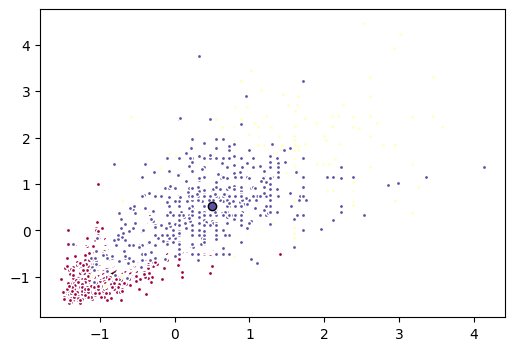

In [34]:
# Preprocessing data by normalization
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X = df_new.values[:, 3:56]
imputer = imputer.fit(X)
X = imputer.transform(X)

Clus_dataSet = StandardScaler().fit_transform(X)

k_means = KMeans(init = 'k-means++', n_clusters = 3, n_init = 12)
k_means.fit(Clus_dataSet)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
fig = plt.figure(figsize = (6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means_cluster_centers)), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(Clus_dataSet[my_members, 0], Clus_dataSet[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
plt.show()


In [35]:
df_new['Class'] = k_means_labels

/var/folders/k7/r3_hs43d4kddbzlf5y2gdgqh0000gn/T/ipykernel_22175/2974476857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Class'] = k_means_labels


In [36]:
# Sample 10 HCOL cities and 10 LCOL cities and see if they make sense
print('Top 10 Highest Cost of Living Cities')
display(df_new[df_new['Class'] == 2].sample(n=10)[['city', 'country']])

print('Top 10 Lowest Cost of Living Cities')
display(df_new[df_new['Class'] == 0].sample(n=10)[['city', 'country']])

Top 10 Highest Cost of Living Cities


,city,country
2604,Maldonado,Uruguay
180,Kaohsiung,Taiwan
3791,Friedrichshafen,Germany
1689,Norwich,United Kingdom
2436,Worthing,United Kingdom
2371,Mulhouse,France
1571,Mainz,Germany
2301,Dordrecht,Netherlands
2322,Linkoping,Sweden
2082,Preston,United Kingdom


Top 10 Lowest Cost of Living Cities


,city,country
1307,Atyrau,Kazakhstan
1644,Talca,Chile
715,Sialkot City,Pakistan
1873,Malayer,Iran
101,Nanchang,China
628,Sao Bernardo do Campo,Brazil
1027,Maringa,Brazil
3982,Prievidza,Slovakia
1774,Rzeszow,Poland
2669,Banska Bystrica,Slovakia


([<matplotlib.patches.Wedge at 0x13037d0d0>,
 [Text(1.0520954786751362, 0.32108426269647117, 'India'),
  Text(0.7789802151633836, 0.7766529626441973, 'Brazil'),
  Text(0.45940461275167915, 0.9994735623229261, 'Russia'),
  Text(0.11825397399833094, 1.0936251632225742, 'Mexico'),
  Text(-0.20935138737677478, 1.0798944377129738, 'Turkey'),
  Text(-0.49204443595239505, 0.9838151620341545, 'China'),
  Text(-0.703699132640739, 0.8454629091336129, 'Romania'),
  Text(-0.8538239769303585, 0.6935305446905903, 'Poland'),
  Text(-0.317935101195741, -1.0530514096793442, 'others')])

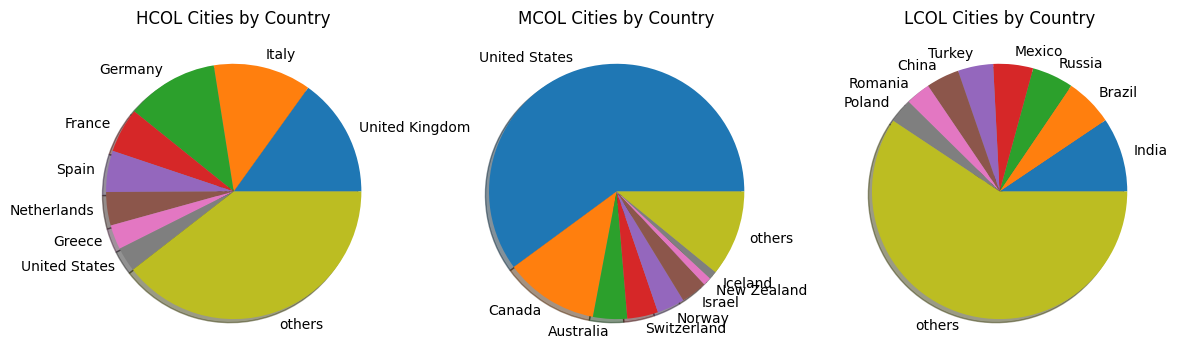

In [38]:
# Split to Distribution
lcol_countries = df_new[df_new['Class']==0].groupby('country').agg(count=('country', 'count')).sort_values(by='count', ascending=False)
mcol_countries = df_new[df_new['Class']==1].groupby('country').agg(count=('country', 'count')).sort_values(by='count', ascending=False)
hcol_countries = df_new[df_new['Class']==2].groupby('country').agg(count=('country', 'count')).sort_values(by='count', ascending=False)

temp_array = [lcol_countries, mcol_countries, hcol_countries]
country_groups = []

# Group into Other after largest 8 groups
for t in temp_array:
    temp = t[:8].copy()
    new_row = pd.DataFrame(index=['others'], data = {'count': [t['count'][8:].sum()]})
    temp = pd.concat([temp, new_row])
    country_groups.append(temp)

# Pie Charts for City Distribution
fig = plt.figure(figsize=(14, 5))
ax1 = plt.subplot(131)
plt.title('HCOL Cities by Country')
plt.pie(country_groups[2]['count'], labels=country_groups[2].index, shadow=True)
ax2 = plt.subplot(132)
plt.title('MCOL Cities by Country')
plt.pie(country_groups[1]['count'], labels=country_groups[1].index, shadow=True)
ax3 = plt.subplot(133)
plt.title('LCOL Cities by Country')
plt.pie(country_groups[0]['count'], labels=country_groups[0].index, shadow=True)